In [137]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data
from sklearn.tree import DecisionTreeClassifier

data = load_data('OJ')


data['Store7'] = [1 if d == 'Yes' else 0 for d in data['Store7']]
y = data['Purchase']
X = data.drop('Purchase', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

x_train

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
442,258,1,1.76,2.18,0.00,0.00,0,0,0.733760,2.18,1.76,0.42,0,0.000000,0.000000,0.42,1
464,265,7,1.86,2.13,0.37,0.00,1,0,0.733760,2.13,1.49,0.64,1,0.000000,0.198925,0.27,0
504,244,3,1.99,2.23,0.00,0.00,0,0,0.754240,2.23,1.99,0.24,0,0.000000,0.000000,0.24,3
732,276,4,2.09,2.09,0.20,0.40,0,0,0.320000,1.69,1.89,-0.20,0,0.191388,0.095694,0.00,4
388,233,2,1.69,1.69,0.00,0.00,0,0,0.105838,1.69,1.69,0.00,0,0.000000,0.000000,0.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,262,1,1.76,1.99,0.00,0.40,0,1,0.500000,1.59,1.76,-0.17,0,0.201005,0.000000,0.23,1
466,269,7,1.86,2.13,0.27,0.00,1,0,0.829606,2.13,1.59,0.54,1,0.000000,0.145161,0.27,0
121,261,1,1.76,1.99,0.00,0.00,0,0,0.967444,1.99,1.76,0.23,0,0.000000,0.000000,0.23,1
1044,241,1,1.86,1.99,0.00,0.30,0,1,0.777178,1.69,1.86,-0.17,0,0.150754,0.000000,0.13,1


# Feature Correlation

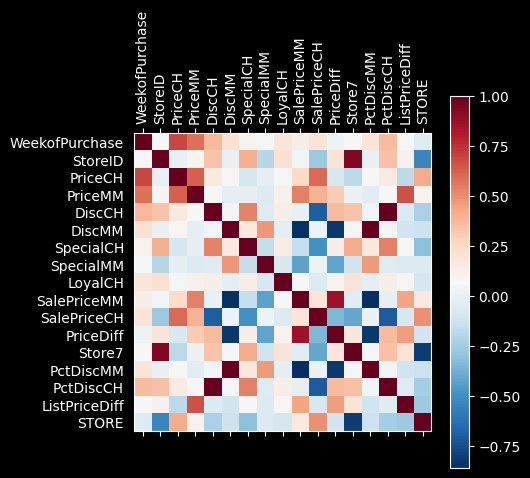

In [138]:
names = x_train.columns
df_features = pd.DataFrame(x_train, columns=names)

corr_mtx = df_features.corr(method='pearson')
plt.matshow(corr_mtx, cmap="RdBu_r")
plt.colorbar()

plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)
plt.grid(False)
plt.show()

## Metric Func


In [139]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay, \
    roc_curve, classification_report


def metrics(preds:np.ndarray, probs:np.ndarray, lables:np.ndarray, method:str):

    preds = [1 if p == 'CH' else 0 for p in preds]
    lables = [1 if l == 'CH' else 0 for l in lables]

    cf_mtx = confusion_matrix(lables, preds)
    fpr, tpr, thresholds = roc_curve(lables, probs)
    roc_area = roc_auc_score(lables, probs)
    accuracy = accuracy_score(lables, preds)

    print(classification_report(lables, preds))

    text = f"{roc_area=}\n{accuracy=}"

    cf_mtx_disp = ConfusionMatrixDisplay(confusion_matrix=cf_mtx)
    roc_disp = RocCurveDisplay(fpr=fpr,tpr=tpr)

    fig, (ax_report, ax_matrix, ax_roc) = plt.subplots(1, 3, figsize=(16, 4))
    ax_report.text(
        x=0.05,
        y=0.95,
        s=text,
        family='monospace',
        fontsize=16,
        verticalalignment='top',
        transform=ax_report.transAxes)
    ax_report.set_title(f'Metrics for {method}')
    ax_report.axis('off')

    ax_matrix.set_title("Confusion Matrix")
    ax_matrix.grid(False)
    ax_matrix = cf_mtx_disp.plot(ax=ax_matrix, cmap='grey')

    ax_roc.set_title('ROC Curve')
    ax_roc.plot(fpr,tpr, linewidth=2, label='ROC Curve', color='red')
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')


    return {"accuracy": accuracy, "roc_score": roc_area}


results = {}

# Fitting and Plotting a tree

In [140]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

##

### Results

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       128
           1       0.75      0.77      0.76       193

    accuracy                           0.71       321
   macro avg       0.69      0.69      0.69       321
weighted avg       0.71      0.71      0.71       321



{'accuracy': 0.7071651090342679, 'roc_score': 0.6950089054404145}

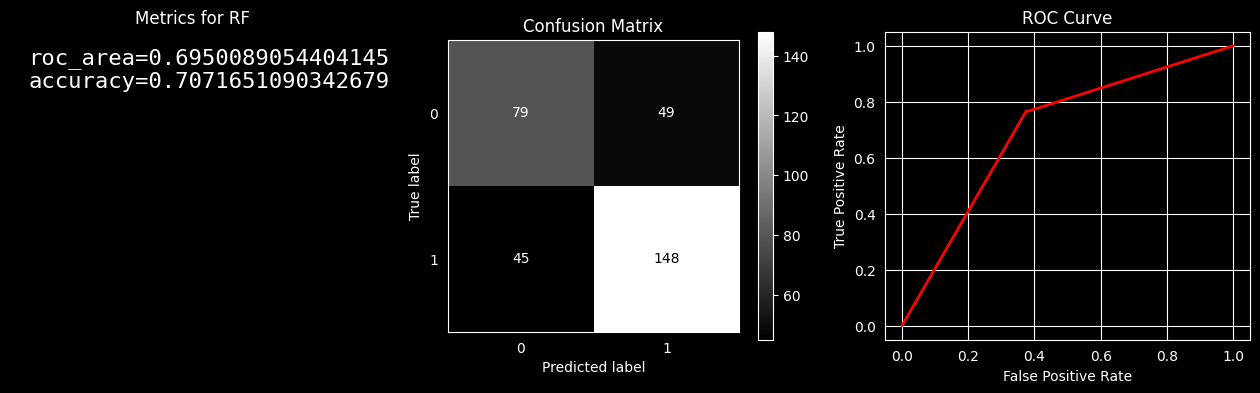

In [141]:
preds = model.predict(x_test)
probs = model.predict_proba(x_test)[:, 0]

metrics(preds, probs, y_test, method="RF")

## Plotting a tree

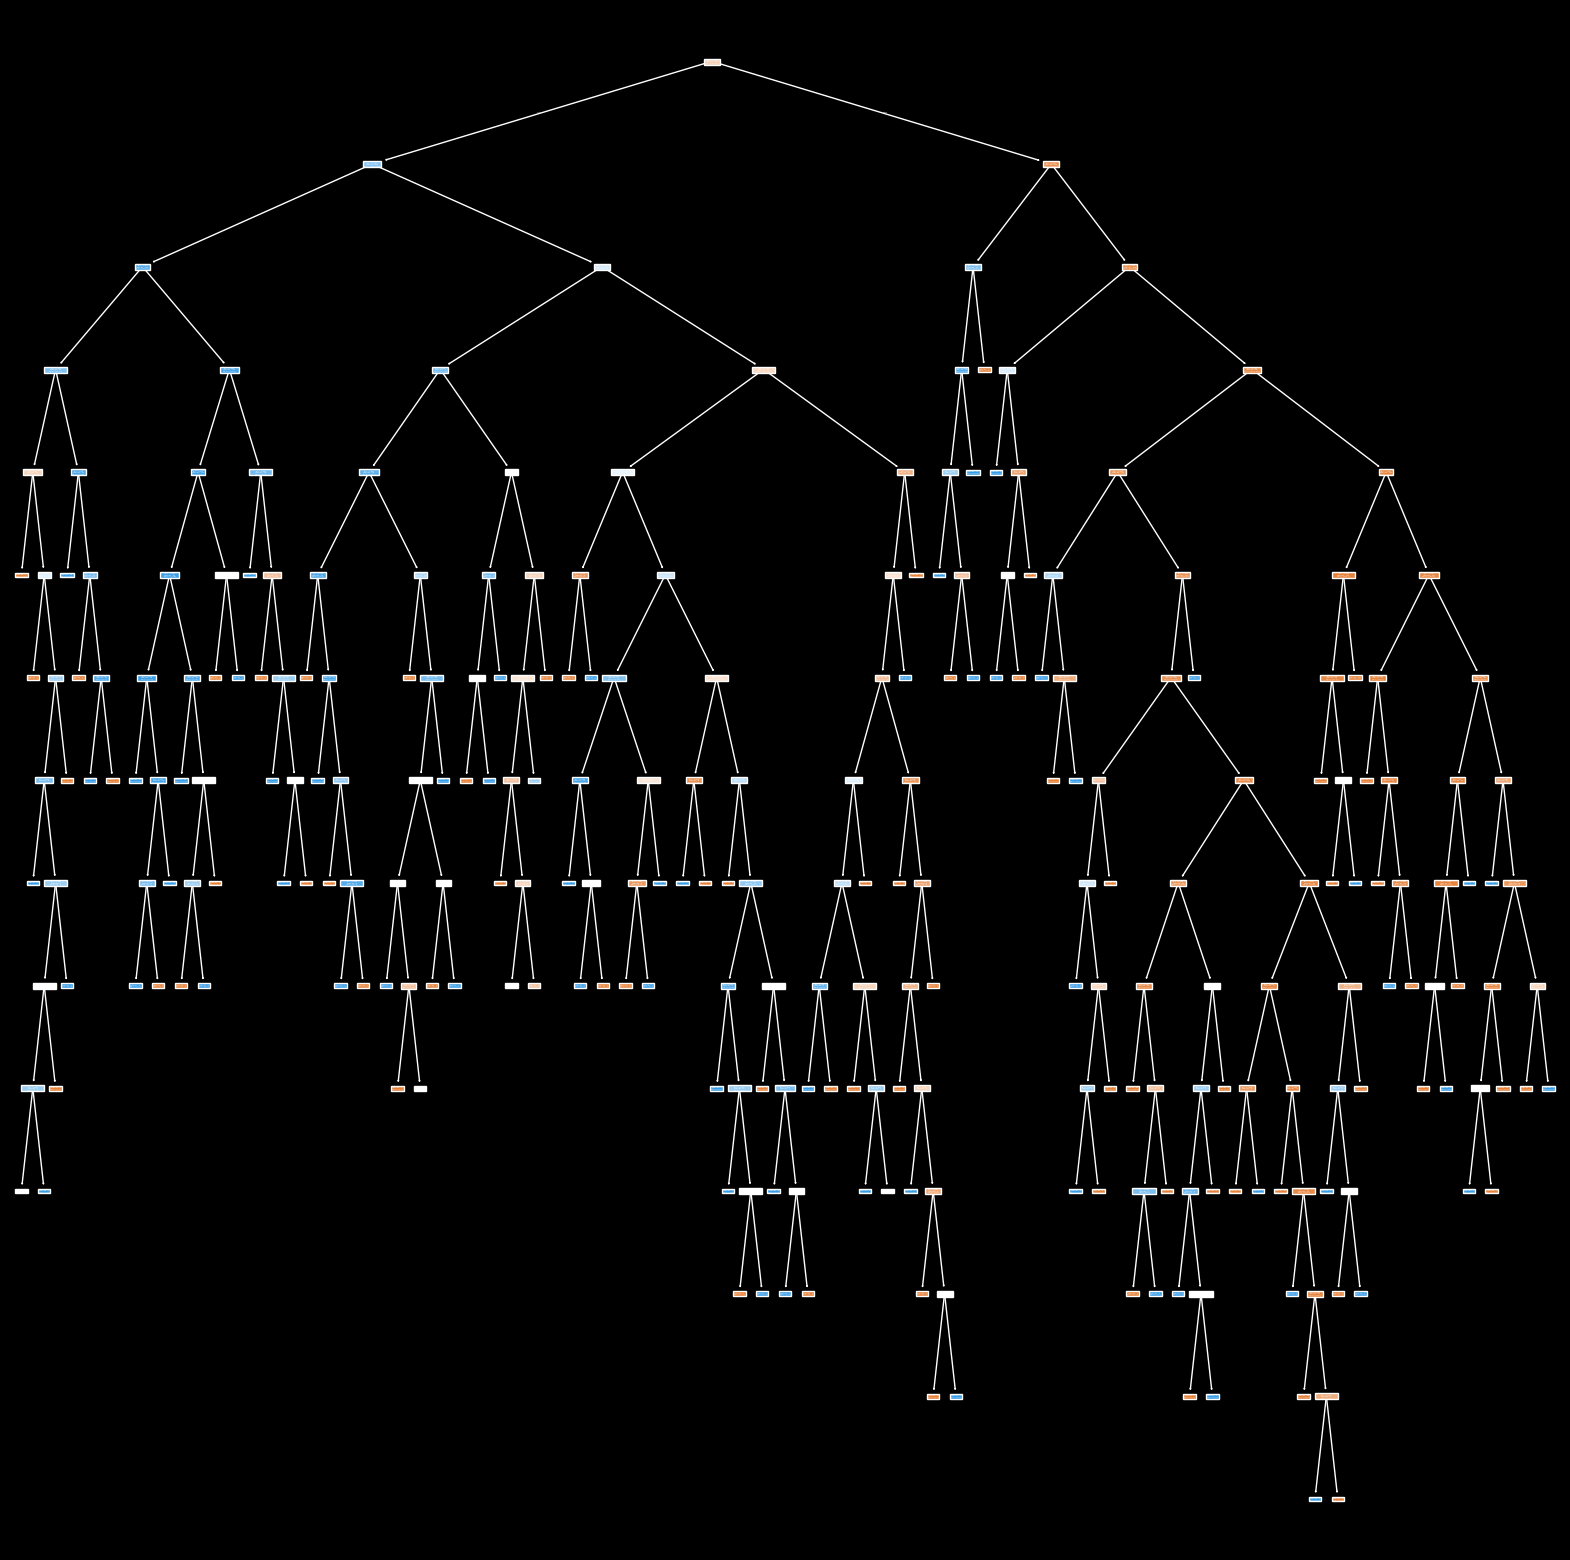

In [142]:
import matplotlib.pyplot as plt
from sklearn import tree
feature_names = x_train.columns


plt.figure(figsize=(20, 20))
tree.plot_tree(model, feature_names=feature_names, filled=True)
plt.show()

# Fit and plot a bit smaller tree
and so on other concepts will be shown on this smaller tree

In [143]:
smaller_tree = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=12, random_state=42)
smaller_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=12, random_state=42)

## Results

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       128
           1       0.81      0.81      0.81       193

    accuracy                           0.78       321
   macro avg       0.77      0.77      0.77       321
weighted avg       0.78      0.78      0.78       321



{'accuracy': 0.7757009345794392, 'roc_score': 0.7808249676165803}

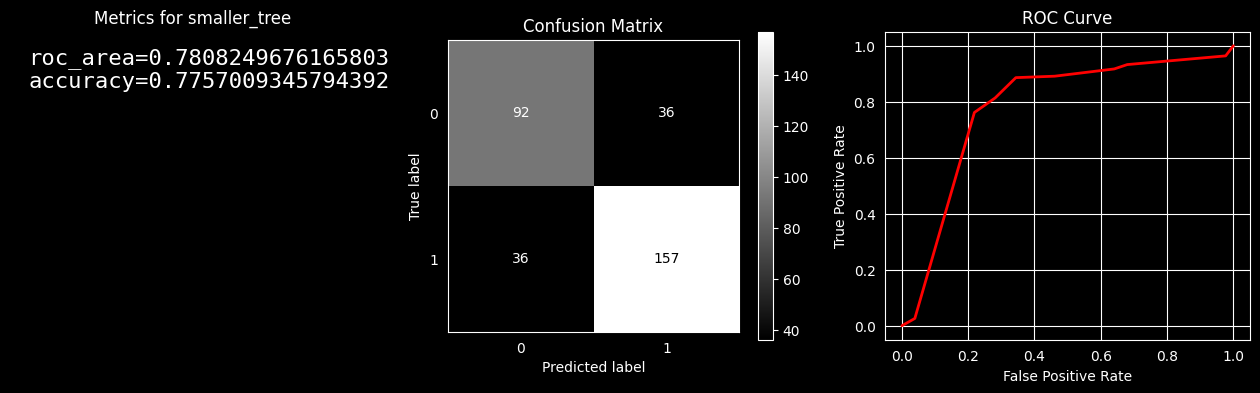

In [144]:
preds = smaller_tree.predict(x_test)
probs = smaller_tree.predict_proba(x_test)[:, 0]

metrics(preds, probs, y_test, method="smaller_tree")

## Plot

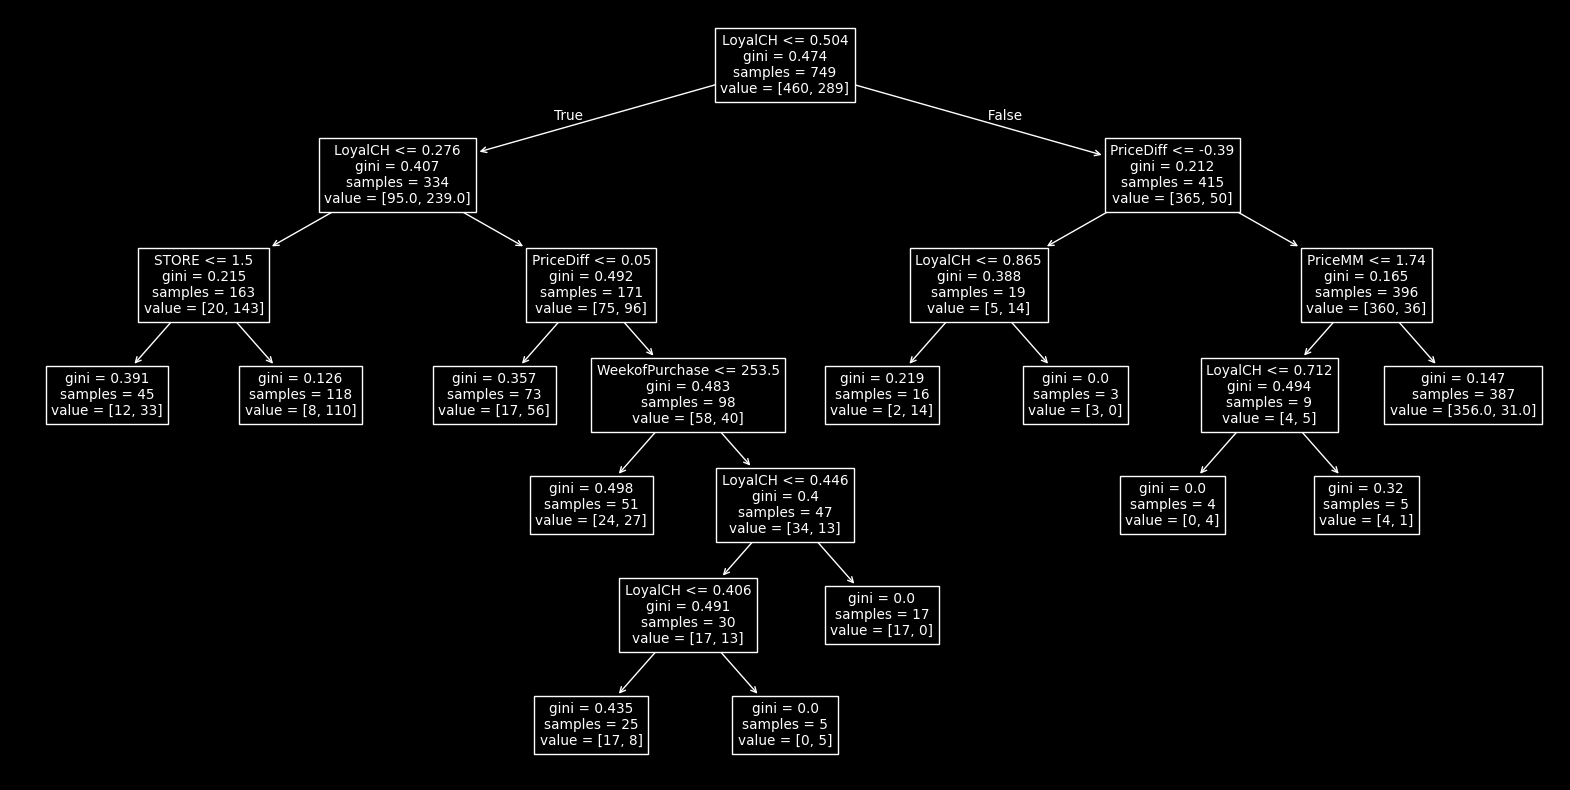

In [145]:
plt.figure(figsize=(20, 10))
tree.plot_tree(smaller_tree, feature_names=feature_names, filled=False)
plt.show()

# Export Tree Function

In [146]:
from sklearn.tree import export_text

text = export_text(smaller_tree, feature_names=feature_names)
print(text)

|--- LoyalCH <= 0.50
|   |--- LoyalCH <= 0.28
|   |   |--- STORE <= 1.50
|   |   |   |--- class: MM
|   |   |--- STORE >  1.50
|   |   |   |--- class: MM
|   |--- LoyalCH >  0.28
|   |   |--- PriceDiff <= 0.05
|   |   |   |--- class: MM
|   |   |--- PriceDiff >  0.05
|   |   |   |--- WeekofPurchase <= 253.50
|   |   |   |   |--- class: MM
|   |   |   |--- WeekofPurchase >  253.50
|   |   |   |   |--- LoyalCH <= 0.45
|   |   |   |   |   |--- LoyalCH <= 0.41
|   |   |   |   |   |   |--- class: CH
|   |   |   |   |   |--- LoyalCH >  0.41
|   |   |   |   |   |   |--- class: MM
|   |   |   |   |--- LoyalCH >  0.45
|   |   |   |   |   |--- class: CH
|--- LoyalCH >  0.50
|   |--- PriceDiff <= -0.39
|   |   |--- LoyalCH <= 0.86
|   |   |   |--- class: MM
|   |   |--- LoyalCH >  0.86
|   |   |   |--- class: CH
|   |--- PriceDiff >  -0.39
|   |   |--- PriceMM <= 1.74
|   |   |   |--- LoyalCH <= 0.71
|   |   |   |   |--- class: MM
|   |   |   |--- LoyalCH >  0.71
|   |   |   |   |--- class: CH
| 

## Feature Imporatnce

[]

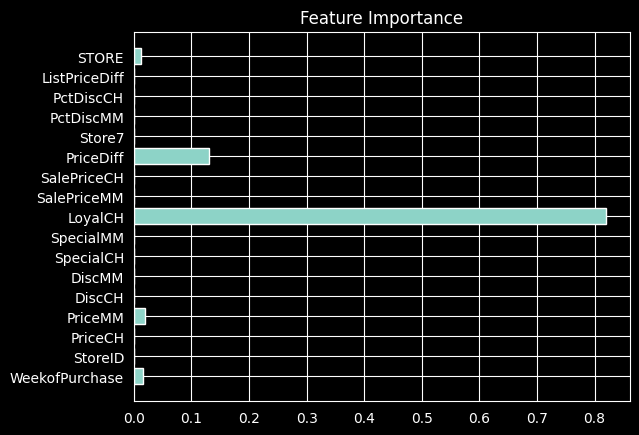

In [147]:
importance = smaller_tree.feature_importances_

plt.barh(feature_names, importance)
plt.title("Feature Importance")
plt.plot()

# Seeking Better tree parameters

In [148]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import optuna

optuna.logging.set_verbosity(optuna.logging.ERROR)
def objective_tree(trial):
    max_depth = trial.suggest_int("max_depth", 1, 20)
    max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 2, 20)
    max_features = trial.suggest_int("max_features", 1, 12)



    tree_model = DecisionTreeClassifier(random_state=42, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes,)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(tree_model, x_train, y_train, cv=cv, scoring= 'roc_auc').mean()

    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective_tree, n_trials=20, show_progress_bar=True)



best_tree = DecisionTreeClassifier(**study.best_params)
best_tree.fit(x_train, y_train)

  0%|          | 0/20 [00:00<?, ?it/s]

DecisionTreeClassifier(max_depth=6, max_features=11, max_leaf_nodes=11)

### Results

              precision    recall  f1-score   support

           0       0.76      0.64      0.69       128
           1       0.78      0.87      0.82       193

    accuracy                           0.78       321
   macro avg       0.77      0.75      0.76       321
weighted avg       0.77      0.78      0.77       321



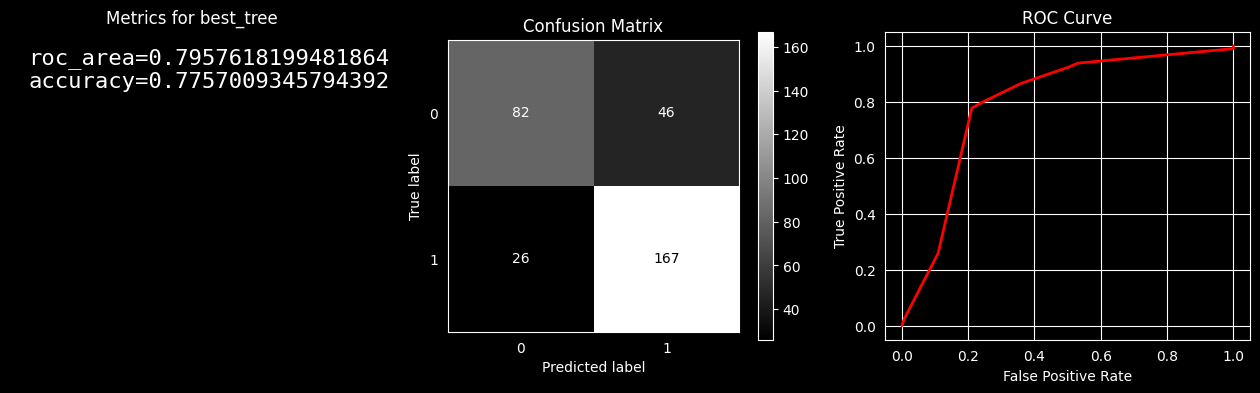

In [149]:
preds = best_tree.predict(x_test)
probs = best_tree.predict_proba(x_test)[:, 0]

results['unpruned_tree'] = metrics(preds, probs, y_test, method="best_tree")

## Plotting

### Tree

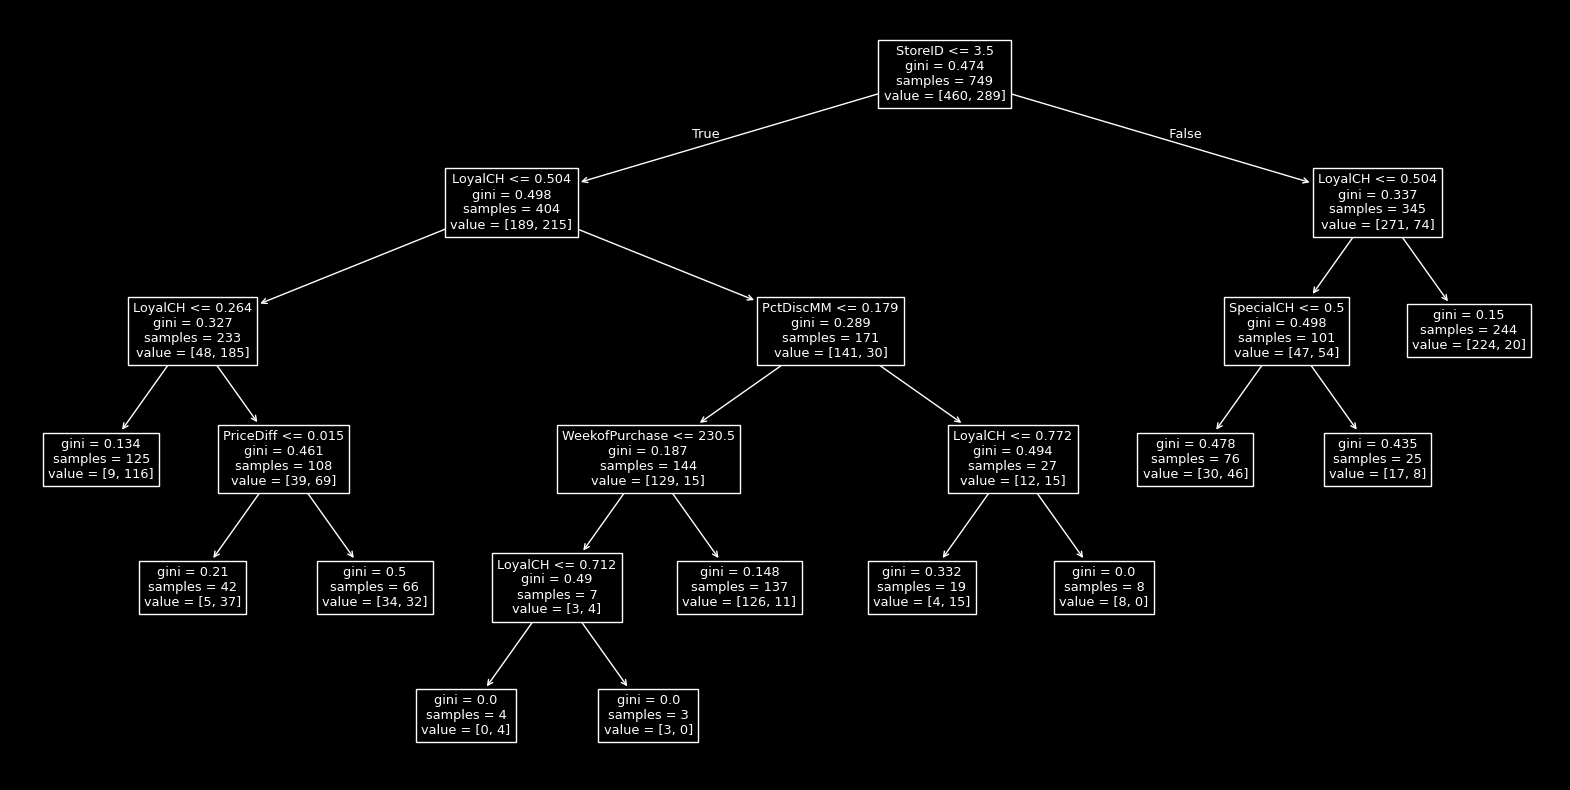

In [150]:
plt.figure(figsize=(20, 10))
tree.plot_tree(best_tree, feature_names=feature_names, filled=False)
plt.show()

## Feature Importance

[]

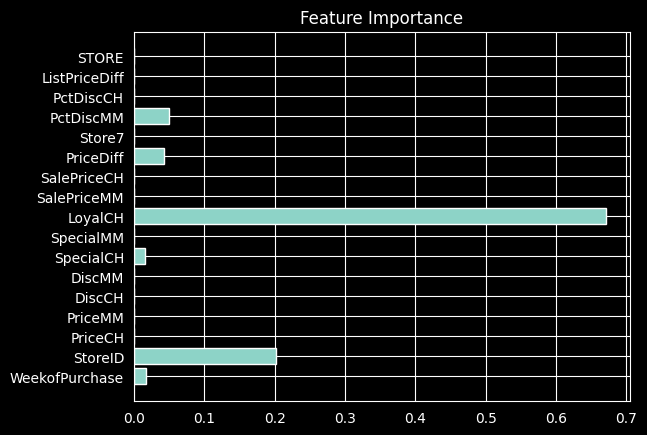

In [151]:
importance = best_tree.feature_importances_

plt.barh(feature_names, importance)
plt.title("Feature Importance")
plt.plot()

# Tree Size vs accuray plot

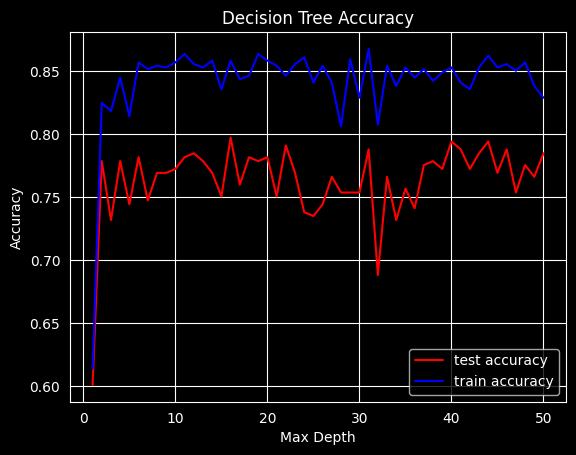

In [152]:
test_acc = []
train_acc = []

model = DecisionTreeClassifier(**study.best_params)
for size in range(1, 51):
    model.set_params(max_depth=size)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    test_acc.append(accuracy_score(y_test, preds))

    preds = model.predict(x_train)
    train_acc.append(accuracy_score(y_train, preds))

plt.plot((range(1, 51)), test_acc, color='red', label='test accuracy')
plt.plot((range(1, 51)), train_acc, color='blue', label='train accuracy')
plt.title("Decision Tree Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Pruning Trees
Using minimal cost complexity pruning with `ccp_alpha` function

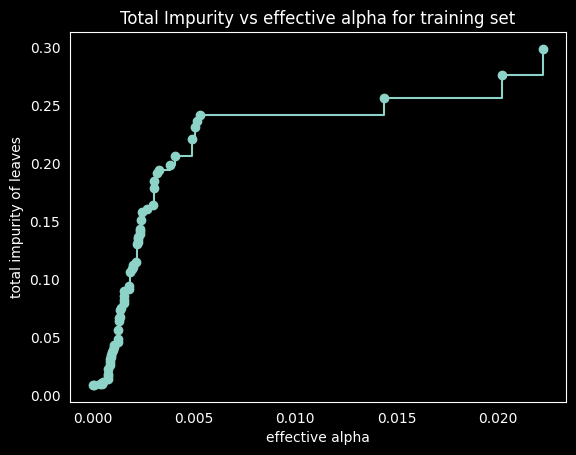

In [153]:
model = DecisionTreeClassifier(random_state=42)
path = model.cost_complexity_pruning_path(x_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities


plt.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.grid(False)
plt.title("Total Impurity vs effective alpha for training set")
plt.show()

## Effectives alphas

Number of nodes in the last tree is: 1 with ccp_alpha: 0.17499343422760927


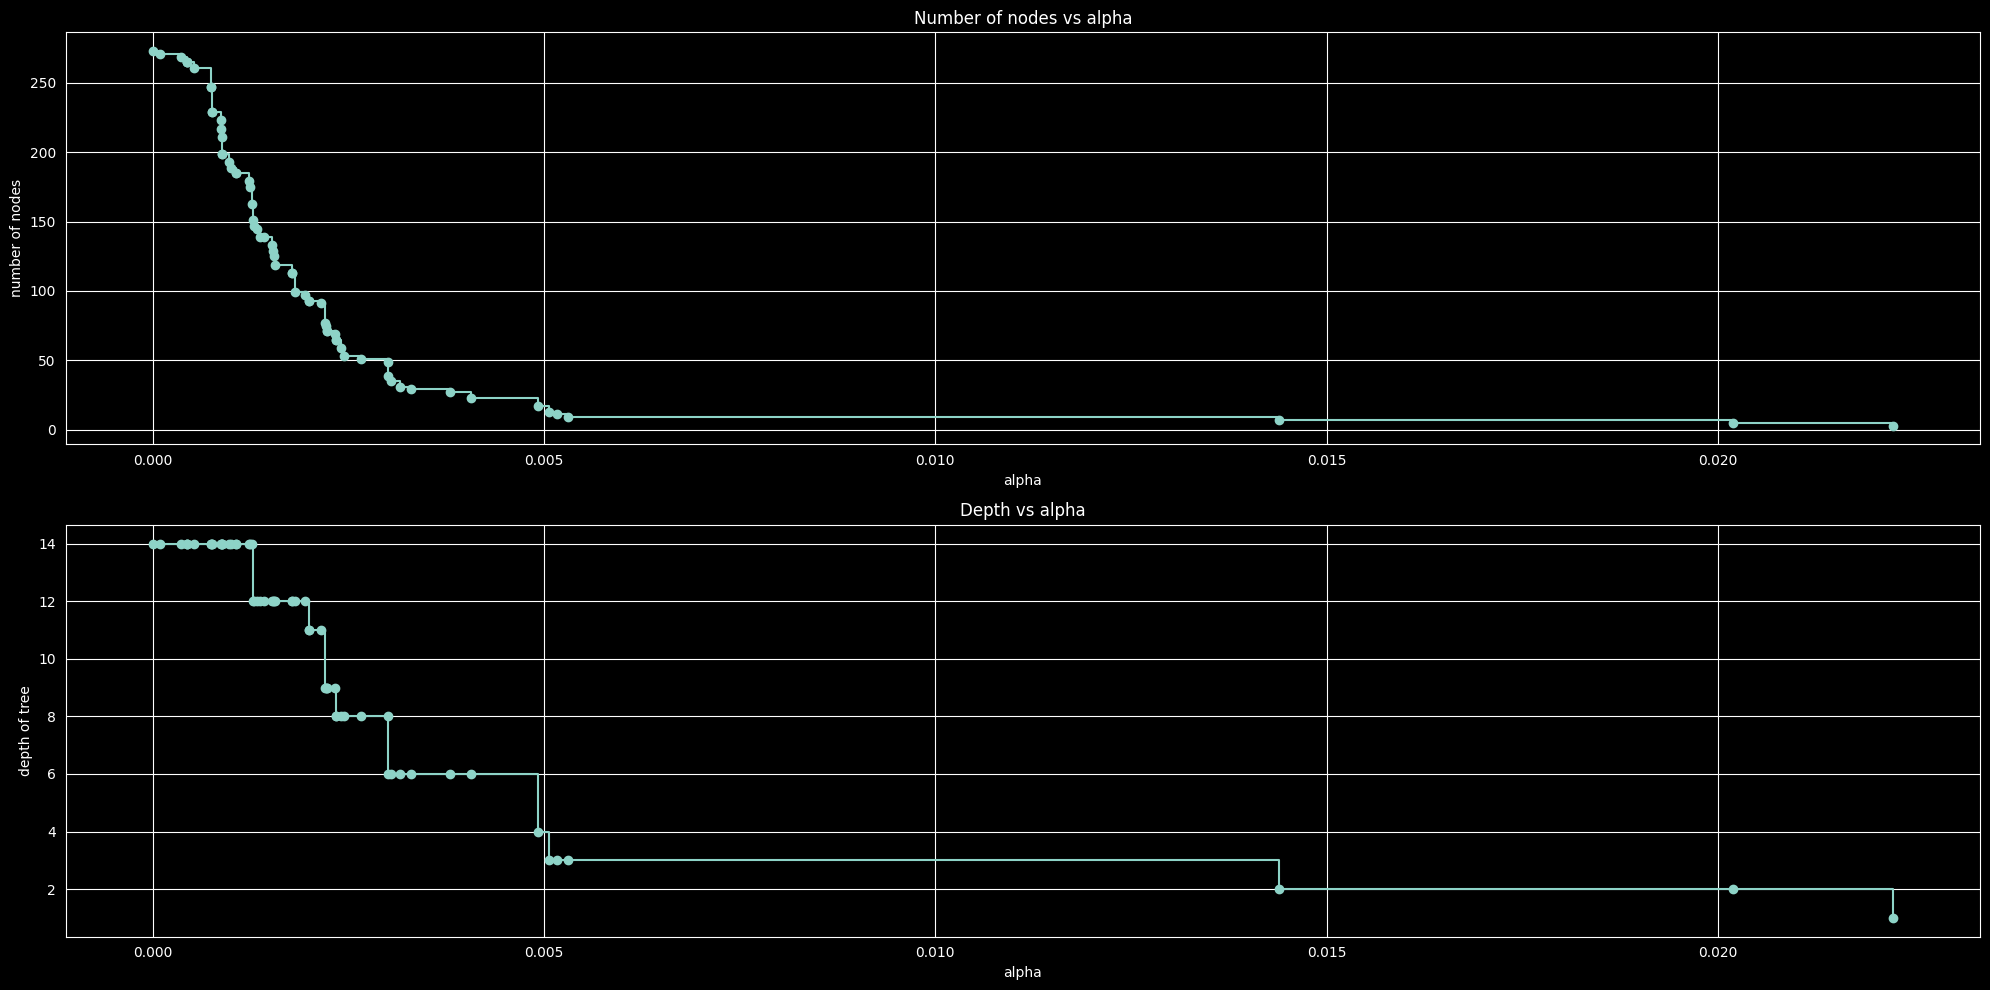

In [154]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


## Accuracy vs alpha

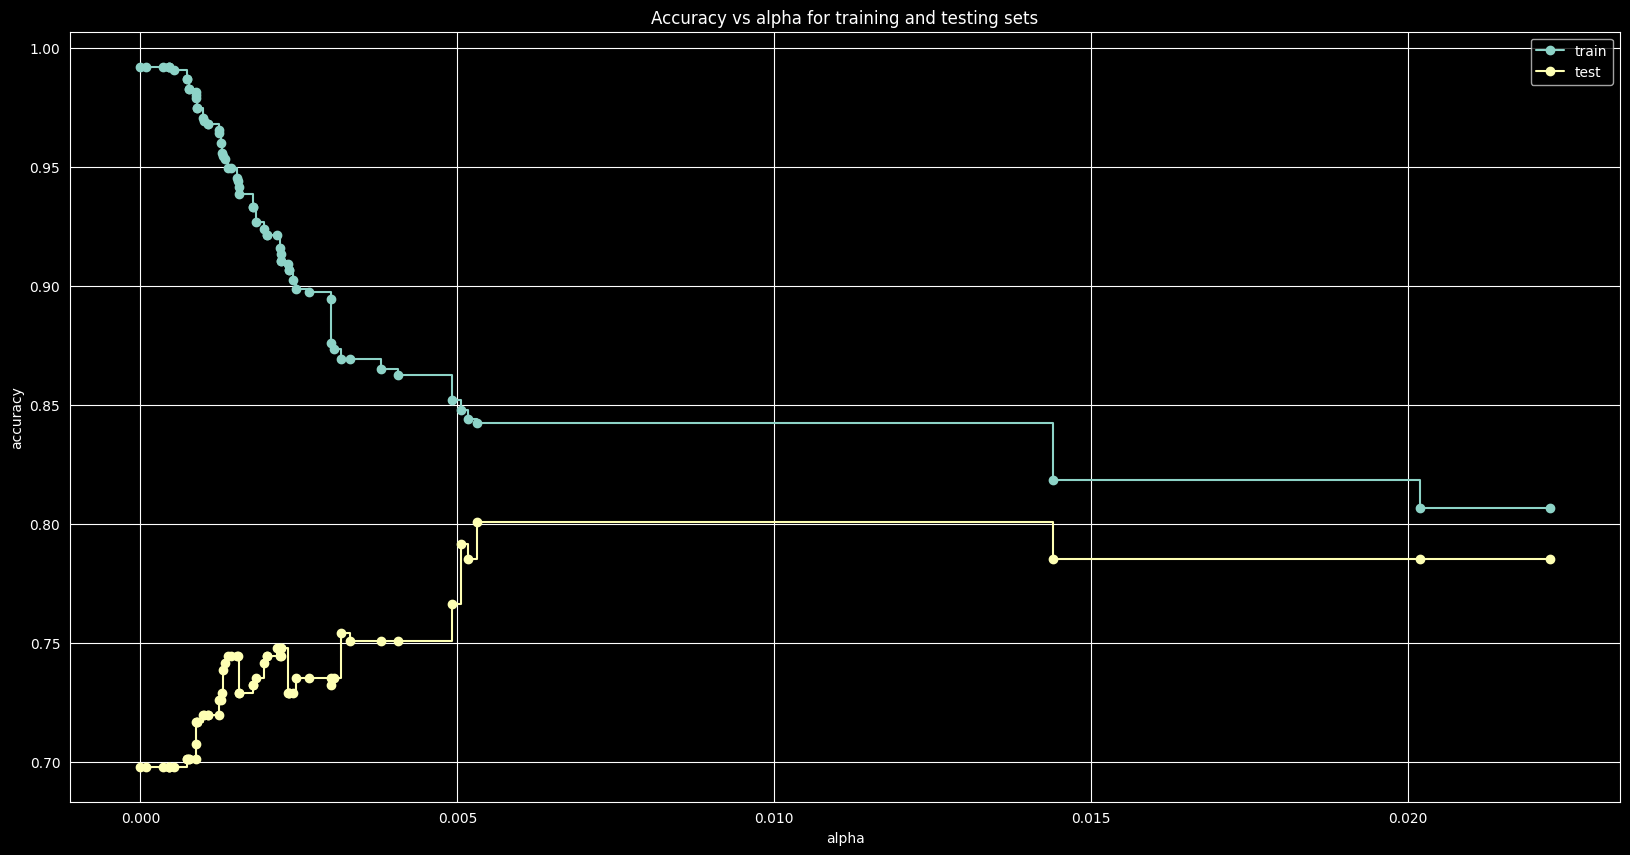

In [155]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# Tuning tree for optimal aplha

In [156]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import optuna

optuna.logging.set_verbosity(optuna.logging.ERROR)
def objective_tree(trial):

    ccp_alpha = trial.suggest_float("ccp_alpha", 0.0, 0.02)

    tree_model = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(tree_model, x_train, y_train, cv=cv, scoring= 'roc_auc').mean()

    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective_tree, n_trials=20, show_progress_bar=True)



pruned_tree = DecisionTreeClassifier(**study.best_params)
pruned_tree.fit(x_train, y_train)

  0%|          | 0/20 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.007431161725127149)

## Results

              precision    recall  f1-score   support

           0       0.81      0.65      0.72       128
           1       0.79      0.90      0.84       193

    accuracy                           0.80       321
   macro avg       0.80      0.77      0.78       321
weighted avg       0.80      0.80      0.80       321



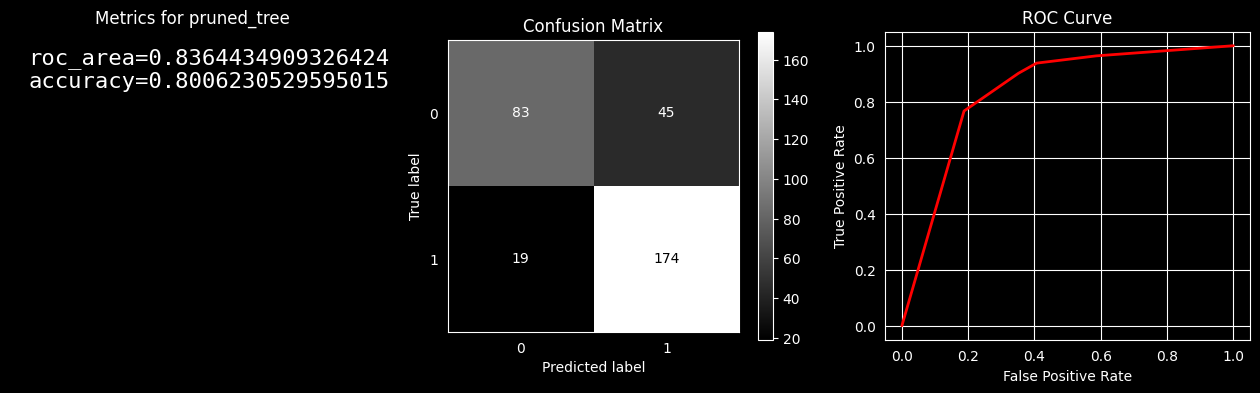

In [157]:
preds = pruned_tree.predict(x_test)
probs = pruned_tree.predict_proba(x_test)[:, 0]

results['pruned_tree'] = metrics(preds, probs, y_test, method="pruned_tree")

# Plots

## Tree

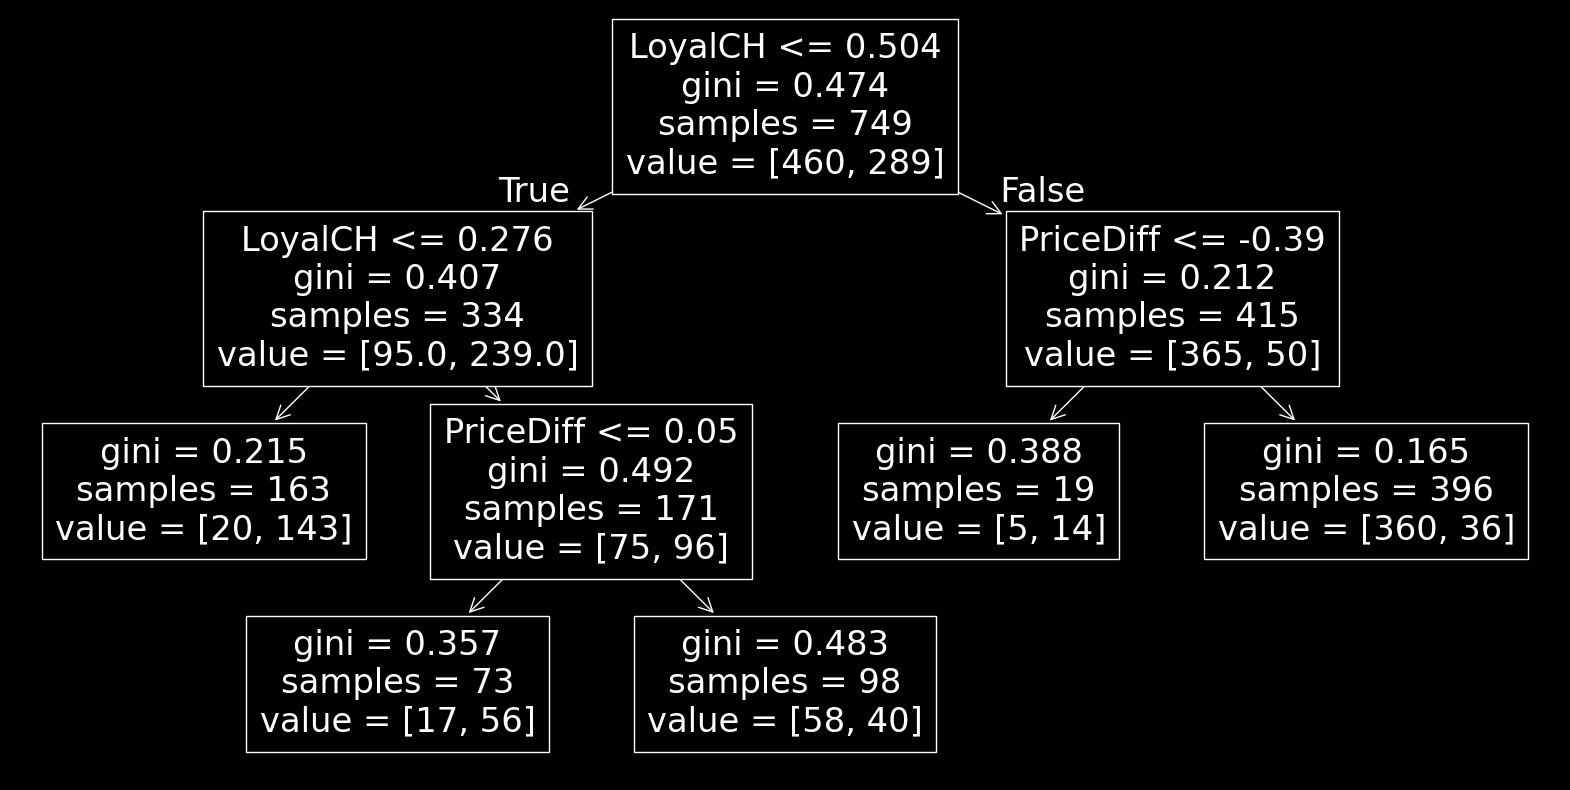

In [158]:
plt.figure(figsize=(20, 10))
tree.plot_tree(pruned_tree, feature_names=feature_names, filled=False)
plt.show()

## Feature Importance

[]

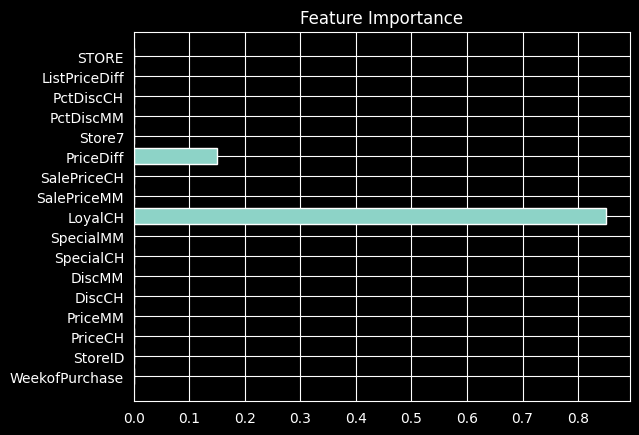

In [159]:
importance = pruned_tree.feature_importances_

plt.barh(feature_names, importance)
plt.title("Feature Importance")
plt.plot()

# Pruned vs Unpruned

In [160]:

df = pd.DataFrame.from_dict(results, orient='index')
df

,accuracy,roc_score
unpruned_tree,0.775701,0.795762
pruned_tree,0.800623,0.836443
